In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [0]:
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
os.getcwd()

In [0]:
os.listdir()

['.config', 'gdrive', 'sample_data']

In [0]:
root_path = './gdrive/My Drive/OST_Project/working/'

In [0]:
image_height = 217
image_width = 223

In [0]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(image_height,image_width,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 217, 223, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 217, 223, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 215, 221, 64)      18496     
_________________________________________________________________
activation_9 (Activation)    (None, 215, 221, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 107, 110, 64)      0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 107, 110, 64)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 107, 110, 64)      36928     
__________

In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_dir = root_path + 'train'
validation_dir = root_path + 'validation'

In [0]:
# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_height, image_width),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_height, image_width),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 7632 images belonging to 10 classes.
Found 792 images belonging to 10 classes.


In [0]:
model.compile(optimizers.rmsprop(lr=0.0005, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
# checkpoint
filepath= root_path + "weights_best2.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      callbacks=callbacks_list,
      verbose=1)

Epoch 1/20
77/76 [==============================] - 118s 2s/step - loss: 2.0090 - acc: 0.2586 - val_loss: 1.6107 - val_acc: 0.4268

Epoch 00001: val_acc improved from -inf to 0.42677, saving model to ./gdrive/My Drive/OST_Project/working/weights_best2.hdf5
Epoch 2/20
77/76 [==============================] - 88s 1s/step - loss: 1.2573 - acc: 0.5801 - val_loss: 1.5354 - val_acc: 0.5076

Epoch 00002: val_acc improved from 0.42677 to 0.50758, saving model to ./gdrive/My Drive/OST_Project/working/weights_best2.hdf5
Epoch 3/20
77/76 [==============================] - 88s 1s/step - loss: 0.8445 - acc: 0.7240 - val_loss: 1.2830 - val_acc: 0.5568

Epoch 00003: val_acc improved from 0.50758 to 0.55682, saving model to ./gdrive/My Drive/OST_Project/working/weights_best2.hdf5
Epoch 4/20
77/76 [==============================] - 88s 1s/step - loss: 0.6357 - acc: 0.7914 - val_loss: 1.3496 - val_acc: 0.6061

Epoch 00004: val_acc improved from 0.55682 to 0.60606, saving model to ./gdrive/My Drive/OST_P

In [0]:
model.save('model_save_wala.h5')

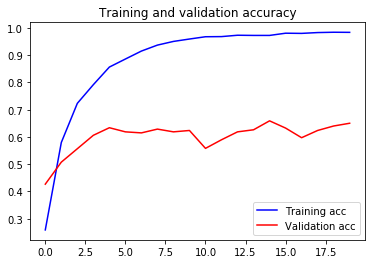

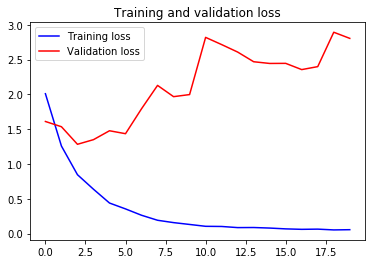

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()